# Title

Name: Yihao Zhang

ID: 67069281

## Introduction

The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. 
My project is to build a LinearRegression and predict Happiness score based on the variable of Economy, Familt, trust, health, and freedom,and find out which variabless might contribute the most to the model. At last I will try to use sklearn to determine whether a country's happiness is beyond expectation.

In [1]:
import altair as alt
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from pandas.api.types import is_numeric_dtype
from sklearn.linear_model import LinearRegression

## Dataframe Outlook

### Import data：

In [2]:
df = pd.read_csv("data happiness.csv", na_values=" ").dropna(axis=0).copy()

In [3]:
df=df.loc[:,["Country name","Regional indicator","Ladder score","Logged GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]].copy()

In [4]:
df

Country name  Regional indicator  Ladder score  Logged GDP per capita  \
0        Finland      Western Europe         7.842                 10.775   
1        Denmark      Western Europe         7.620                 10.933   
2    Switzerland      Western Europe         7.571                 11.117   
3        Iceland      Western Europe         7.554                 10.878   
4    Netherlands      Western Europe         7.464                 10.932   
..           ...                 ...           ...                    ...   
144      Lesotho  Sub-Saharan Africa         3.512                  7.926   
145     Botswana  Sub-Saharan Africa         3.467                  9.782   
146       Rwanda  Sub-Saharan Africa         3.415                  7.676   
147     Zimbabwe  Sub-Saharan Africa         3.145                  7.943   
148  Afghanistan          South Asia         2.523                  7.695   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             0.954                   72.000                         0.949   
1             0.954                   72.700                         0.946   
2             0.942                   74.400                         0.919   
3             0.983                   73.000                         0.955   
4             0.942                   72.400                         0.913   
..              ...                      ...                           ...   
144           0.787                   48.700                         0.715   
145           0.784                   59.269                         0.824   
146           0.552                   61.400                         0.897   
147           0.750                   56.201                         0.677   
148           0.463                   52.493                         0.382   

     Generosity  Perceptions of corruption  
0        -0.098                      0.186  
1         0.030                      0.179  
2         0.025                      0.292  
3         0.160                      0.673  
4         0.175                      0.338  
..          ...                        ...  
144      -0.131                      0.915  
145      -0.246                      0.801  
146       0.061                      0.167  
147      -0.047                      0.821  
148      -0.102                      0.924  

[149 rows x 9 columns]

In [5]:
df.shape

(149, 9)

Rank the Countries With Most Happiness Ladder Score

In [6]:
df["Ladder score"].sort_values(ascending= False)

0      7.842
1      7.620
2      7.571
3      7.554
4      7.464
       ...  
144    3.512
145    3.467
146    3.415
147    3.145
148    2.523
Name: Ladder score, Length: 149, dtype: float64

In [7]:
df["Rank"]=pd.Series(range(1,150))

The Daraframe is already in descending sorting, therefore we can distribute ranks to the countries directly.

### 10 Countries With Most Happiness Ladder Score

In [8]:
df[["Country name","Rank"]].head(10)

Country name  Rank
0      Finland     1
1      Denmark     2
2  Switzerland     3
3      Iceland     4
4  Netherlands     5
5       Norway     6
6       Sweden     7
7   Luxembourg     8
8  New Zealand     9
9      Austria    10

### 10 Countries With Least Happiness Ladder Score

In [9]:
df[["Country name","Rank"]].tail(10)

Country name  Rank
139      Burundi   140
140        Yemen   141
141     Tanzania   142
142        Haiti   143
143       Malawi   144
144      Lesotho   145
145     Botswana   146
146       Rwanda   147
147     Zimbabwe   148
148  Afghanistan   149

## Data visualization

### Distributing the Level of happiness regards to Quantiles of Ladder score

In [10]:
Medianhp=df["Ladder score"].quantile(q=0.5)
firstq=df["Ladder score"].quantile(q=0.25)
thirdq=df["Ladder score"].quantile(q=0.75)

In [11]:
def quartile(data):
    if data >= thirdq:
        return("Very Happy")
    if data <= firstq:
        return("Not Happy")
    if Medianhp >= data >= firstq:
        return("Less Happy")
    if thirdq >= data >= Medianhp:
        return("Happy")

In [12]:
df["Happiness"]= df["Ladder score"].map(quartile)

In [13]:
df[["Country name","Regional indicator","Happiness"]]

Country name  Regional indicator   Happiness
0        Finland      Western Europe  Very Happy
1        Denmark      Western Europe  Very Happy
2    Switzerland      Western Europe  Very Happy
3        Iceland      Western Europe  Very Happy
4    Netherlands      Western Europe  Very Happy
..           ...                 ...         ...
144      Lesotho  Sub-Saharan Africa   Not Happy
145     Botswana  Sub-Saharan Africa   Not Happy
146       Rwanda  Sub-Saharan Africa   Not Happy
147     Zimbabwe  Sub-Saharan Africa   Not Happy
148  Afghanistan          South Asia   Not Happy

[149 rows x 3 columns]

Distrubute countries to 4 happiness level by using the 1st and 3 rd quantiles, and the median of the ladder score.

### Graph Regards to Level of Happiness

In [14]:
c1 = alt.Chart(df).mark_point().encode(
    x=alt.X("Regional indicator", scale=alt.Scale(zero=False)),
    y=alt.Y("Ladder score", scale=alt.Scale(zero=False)),
    color="Happiness",
    tooltip=["Country name","Logged GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]
).properties(
    height=800,
    width=300,
    title="Country Region VS Happiness Ladder Score"
)
c1

alt.Chart(...)

### Ladder Score Global distrubution

Use plotly to draw graph with world map to see the rough ladder score distribution related to the country region

In [15]:
import plotly.express as px
fig = px.choropleth(
    df,
    locations="Country name",
    color="Ladder score",
    locationmode="country names",
    color_continuous_scale=px.colors.sequential.Plasma
)
fig.update_layout(title="Ladder Score worldwide distribution")
fig.show()

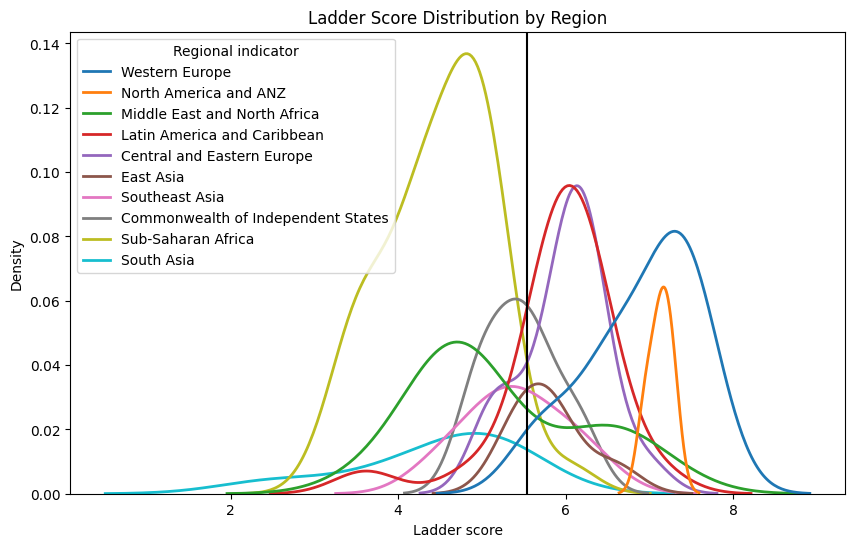

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=df["Ladder score"], hue=df["Regional indicator"],fill=False, linewidth=2)
plt.axvline(df["Ladder score"].mean(), c="black")
plt.title("Ladder Score Distribution by Region")
plt.show()

### Scatterplot with Numerical variable as x axis, Ladder score as y axis, with Color Indicating its Region

In [17]:
chart_list = []
for i in df.columns:
    c = alt.Chart(df).mark_circle().encode(
    x=alt.X(i, scale=alt.Scale(zero=False)),
    y = "Ladder score",
    color=alt.Color("Regional indicator", scale=alt.Scale(scheme='dark2')),
    tooltip=["Country name","Logged GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]
).properties(
    title=f"{i} VS Happiness Ladder Score"
)
    chart_list.append(c)

In [18]:
alt.hconcat(chart_list[3], chart_list[4], chart_list[5],chart_list[6],chart_list[7],chart_list[8])

alt.HConcatChart(...)

Plotly Bar Chart with region as x axis and average ladder score as y axis

In [19]:
import plotly.express as px
avg = pd.DataFrame(df.groupby('Regional indicator')['Ladder score'].mean())

fig = px.bar(df, x=avg.index, y=avg["Ladder score"])
fig.show()

After drawing the diagram based on the Regional indicator, Happiness level and Ladder score. By looking at the chart above, we can say that Western Europe and Central and Eastern Europecountries tend to have happier perception of life, Sub-Saharan Africa and South Asia countries tend to have a less happier perception of current life. We can also see that economy, healthy life and social support form a clearer correlation with happiness ladder score compared to other variables.  We see a clearly positive correlation between GDP and Happiness, and between social support and Happiness

### Clustering the Countries use Standard Scaler and KMeans Clustering

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [21]:
pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("kmeans", KMeans(n_clusters=5))
    ]
)

In [22]:
cols0=["Ladder score","Logged GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]

In [23]:
pipe.fit(df[cols0])

Pipeline(steps=[('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=5))])

In [24]:
arr=pipe.predict(df[cols0])

In [25]:
df["cluster"] = arr

### Scatterplot with Numerical variable as x axis, Ladder score as y axis, with Color Indicating its Cluster

In [26]:
chart_list0 = []
for i in df.columns:
    e = alt.Chart(df).mark_circle().encode(
    x=alt.X(i, scale=alt.Scale(zero=False)),
    y = "Ladder score",
    color=alt.Color("cluster:N", scale=alt.Scale(scheme='blues')),
    tooltip=["Country name","Logged GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]
).properties(
    title=f"{i} VS Happiness Ladder Score with Cluster"
)
    chart_list0.append(e)

In [27]:
alt.hconcat(chart_list0[3], chart_list0[4], chart_list0[5],chart_list0[6],chart_list0[7],chart_list0[8])

alt.HConcatChart(...)

### Correlations and Feature Selection

In [28]:
cols=["Logged GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]

<AxesSubplot: >

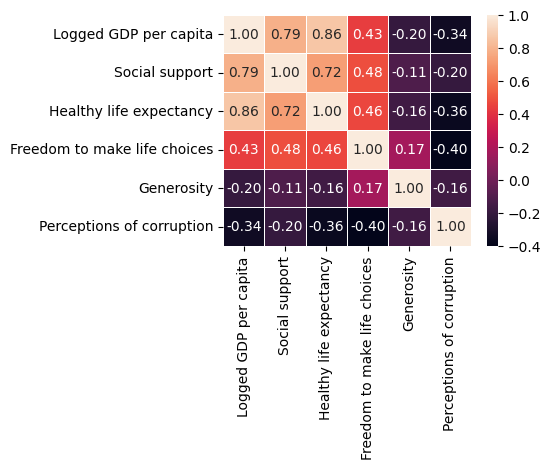

In [29]:
import matplotlib.pyplot  as plt
import seaborn as sns
plt.figure(figsize=(4,3))
sns.heatmap(df[cols].corr(),annot=True,fmt=".2f",linewidth=0.7)

In [30]:
corr = df[df.columns].corr()
corr.sort_values(["Ladder score"], ascending = False, inplace = True)
print(corr["Ladder score"])

Ladder score                    1.000000
Logged GDP per capita           0.789760
Healthy life expectancy         0.768099
Social support                  0.756888
Freedom to make life choices    0.607753
Generosity                     -0.017799
cluster                        -0.075286
Perceptions of corruption      -0.421140
Rank                           -0.984265
Name: Ladder score, dtype: float64


We see the variable with most correlation with the ladder score is GDP, and the least correlated variable is Generosity.

## Linear Regression and Prediction

### Sklearn Linear Regression Based on Numerical Variables Only

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
cols=["Logged GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]
reg.fit(df[cols],df["Ladder score"])
pd.Series(reg.coef_,index=cols)

Logged GDP per capita           0.279533
Social support                  2.476206
Healthy life expectancy         0.030314
Freedom to make life choices    2.010465
Generosity                      0.364382
Perceptions of corruption      -0.605092
dtype: float64

In [32]:
reg.coef_

array([ 0.2795329 ,  2.47620585,  0.03031381,  2.0104647 ,  0.36438194,
       -0.60509177])

In [33]:
print(f"The equation is: Pred Price = {cols[0]} x {reg.coef_[0]} + {cols[1]} x {reg.coef_[1]}+{cols[2]} x {reg.coef_[2]}+{cols[3]} x {reg.coef_[3]}+{cols[4]} x {reg.coef_[4]}+{cols[5]} x {reg.coef_[5]} + {reg.intercept_}") 


The equation is: Pred Price = Logged GDP per capita x 0.2795328970903119 + Social support x 2.476205853915902+Healthy life expectancy x 0.030313812350904194+Freedom to make life choices x 2.01046470184026+Generosity x 0.3643819429244515+Perceptions of corruption x -0.6050917656434847 + -2.2372192944749907


In [34]:
df["Pred"] = reg.predict(df[cols])

Constructing graph to see the differences of true ladder score and predicted data.

In [35]:
import altair as alt
chartlist2=[]
for i in cols:
    c=alt.Chart(df).mark_circle().encode(
        x=alt.X(i, scale=alt.Scale(zero=False)),
        y="Ladder score",
        color=alt.Color("Regional indicator", scale=alt.Scale(scheme='dark2')),
    )
    c1=alt.Chart(df).mark_line().encode(
        x=alt.X(i, scale=alt.Scale(zero=False)),
        y="Pred",
    )
    c3=c+c1
    chartlist2.append(c3)
alt.hconcat(*chartlist2)

alt.HConcatChart(...)

### Build training and test set：

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[cols],df["Ladder score"],test_size = 0.3, random_state=1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
predtrain= model.predict(X_train)

predtest= model.predict(X_test)

print("Accuracy on Traing set: ",model.score(X_train,y_train))
print("Accuracy on Testing set: ",model.score(X_test,y_test))

Accuracy on Traing set:  0.7816778724066249
Accuracy on Testing set:  0.6683353869020149


In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("Mean Squared Error: ",mean_squared_error(y_test, predtest))
print("R^2 Score: ",r2_score(y_test,predtest))

Mean Squared Error:  0.3334530610483154
R^2 Score:  0.6683353869020149


Interpreting the R^2 score, The model is explaining almost 67% of variablity of the variance fo the training data, and we get a score of 0.78 on the accuracy of Training set, a score of 0.67 on the accuracy of Testing set, 

As we can see the model does not have a really good model score and accuracy, to improve our model, we put variable of region indicator into consideration.

## Improvements of Prediction Model

### Create Binary Variables Column to improve Model accuracy, taking consideration of country geographic location

In [38]:
df2=pd.get_dummies(df["Regional indicator"])

In [39]:
df3=pd.concat([df, df2], axis=1).copy()

In [40]:
df3

Country name  Regional indicator  Ladder score  Logged GDP per capita  \
0        Finland      Western Europe         7.842                 10.775   
1        Denmark      Western Europe         7.620                 10.933   
2    Switzerland      Western Europe         7.571                 11.117   
3        Iceland      Western Europe         7.554                 10.878   
4    Netherlands      Western Europe         7.464                 10.932   
..           ...                 ...           ...                    ...   
144      Lesotho  Sub-Saharan Africa         3.512                  7.926   
145     Botswana  Sub-Saharan Africa         3.467                  9.782   
146       Rwanda  Sub-Saharan Africa         3.415                  7.676   
147     Zimbabwe  Sub-Saharan Africa         3.145                  7.943   
148  Afghanistan          South Asia         2.523                  7.695   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             0.954                   72.000                         0.949   
1             0.954                   72.700                         0.946   
2             0.942                   74.400                         0.919   
3             0.983                   73.000                         0.955   
4             0.942                   72.400                         0.913   
..              ...                      ...                           ...   
144           0.787                   48.700                         0.715   
145           0.784                   59.269                         0.824   
146           0.552                   61.400                         0.897   
147           0.750                   56.201                         0.677   
148           0.463                   52.493                         0.382   

     Generosity  Perceptions of corruption  Rank  ...  \
0        -0.098                      0.186     1  ...   
1         0.030                      0.179     2  ...   
2         0.025                      0.292     3  ...   
3         0.160                      0.673     4  ...   
4         0.175                      0.338     5  ...   
..          ...                        ...   ...  ...   
144      -0.131                      0.915   145  ...   
145      -0.246                      0.801   146  ...   
146       0.061                      0.167   147  ...   
147      -0.047                      0.821   148  ...   
148      -0.102                      0.924   149  ...   

    Central and Eastern Europe  Commonwealth of Independent States  East Asia  \
0                            0                                   0          0   
1                            0                                   0          0   
2                            0                                   0          0   
3                            0                                   0          0   
4                            0                                   0          0   
..                         ...                                 ...        ...   
144                          0                                   0          0   
145                          0                                   0          0   
146                          0                                   0          0   
147                          0                                   0          0   
148                          0                                   0          0   

     Latin America and Caribbean  Middle East and North Africa  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   
..                           ...                           ...   
144                   

In [41]:
cols4=[ 'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 
       'Central and Eastern Europe', 'Commonwealth of Independent States',
       'East Asia', 'Latin America and Caribbean',
       'Middle East and North Africa', 'North America and ANZ', 'South Asia',
       'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe']

### Build Training and Testing set for the New Model

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df3[cols4],df3["Ladder score"],test_size = 0.3, random_state=1)
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train,y_train)
pred2= model2.predict(X_train)
predtest2=model2.predict(X_test)
print("Accuracy on Traing set: ",model2.score(X_train,y_train))
print("Accuracy on Testing set: ",model2.score(X_test,y_test))

Accuracy on Traing set:  0.8272728525667357
Accuracy on Testing set:  0.7353645962541258


In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("Mean Squared Error: ",mean_squared_error(y_test, predtest2))
print("R^2 Score: ",r2_score(y_test,predtest2))

Mean Squared Error:  0.2660624074921989
R^2 Score:  0.7353645962541258


Interpreting the R^2 score, The new model is explaining almost 74% of variablity of the variance fo the training data, and we get higher model  accuracy score on both of the training set and testing set, and we also get less Mean Squared Error.

### sklearn Linear Regression of the New Model

In [44]:
from sklearn.linear_model import LinearRegression
reg2 = LinearRegression()
reg2.fit(df3[cols4],df3["Ladder score"])
pd.Series(reg2.coef_,index=cols4)

Logged GDP per capita                 0.267515
Social support                        1.949552
Healthy life expectancy               0.014086
Freedom to make life choices          2.266572
Generosity                            0.497026
Perceptions of corruption            -0.328476
Central and Eastern Europe            0.170953
Commonwealth of Independent States   -0.189213
East Asia                            -0.048350
Latin America and Caribbean           0.299890
Middle East and North Africa         -0.108041
North America and ANZ                 0.520121
South Asia                           -0.557216
Southeast Asia                       -0.460052
Sub-Saharan Africa                   -0.134426
Western Europe                        0.506334
dtype: float64

In [45]:
reg2.coef_

array([ 0.26751474,  1.94955181,  0.01408642,  2.26657235,  0.49702641,
       -0.32847612,  0.17095269, -0.18921326, -0.04834953,  0.29989009,
       -0.10804123,  0.52012137, -0.55721574, -0.46005188, -0.13442618,
        0.50633366])

In [46]:
print(f"The equation is: Pred Price = {cols4[0]} x {reg2.coef_[0]} + {cols4[1]} x {reg2.coef_[1]}+{cols4[2]} x {reg2.coef_[2]}+{cols4[3]} x {reg2.coef_[3]}+{cols4[4]} x {reg2.coef_[4]}+{cols4[5]} x {reg2.coef_[5]}+{cols4[6]} x {reg2.coef_[6]}+{cols4[7]} x {reg2.coef_[7]}+{cols4[8]} x {reg2.coef_[8]}+{cols4[9]} x {reg2.coef_[9]}+{cols4[10]} x {reg2.coef_[10]}+{cols4[11]} x {reg2.coef_[11]}+{cols4[12]} x {reg2.coef_[12]}+{cols4[13]} x {reg2.coef_[13]}+{cols4[14]} x {reg2.coef_[14]}+{cols4[15]} x {reg2.coef_[15]} + {reg2.intercept_}") 


The equation is: Pred Price = Logged GDP per capita x 0.2675147422939184 + Social support x 1.9495518113713843+Healthy life expectancy x 0.014086415435709418+Freedom to make life choices x 2.2665723530069286+Generosity x 0.4970264092008061+Perceptions of corruption x -0.32847612358341893+Central and Eastern Europe x 0.17095269208625866+Commonwealth of Independent States x -0.1892132556381877+East Asia x -0.048349528121480884+Latin America and Caribbean x 0.29989008516075766+Middle East and North Africa x -0.10804122503952122+North America and ANZ x 0.5201213713676418+South Asia x -0.5572157356073879+Southeast Asia x -0.46005188026096594+Sub-Saharan Africa x -0.13442618032271927+Western Europe x 0.5063336563756091 + -1.0711857633458735


In [47]:
df3["Pred"] = reg2.predict(df3[cols4])
df3

Country name  Regional indicator  Ladder score  Logged GDP per capita  \
0        Finland      Western Europe         7.842                 10.775   
1        Denmark      Western Europe         7.620                 10.933   
2    Switzerland      Western Europe         7.571                 11.117   
3        Iceland      Western Europe         7.554                 10.878   
4    Netherlands      Western Europe         7.464                 10.932   
..           ...                 ...           ...                    ...   
144      Lesotho  Sub-Saharan Africa         3.512                  7.926   
145     Botswana  Sub-Saharan Africa         3.467                  9.782   
146       Rwanda  Sub-Saharan Africa         3.415                  7.676   
147     Zimbabwe  Sub-Saharan Africa         3.145                  7.943   
148  Afghanistan          South Asia         2.523                  7.695   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             0.954                   72.000                         0.949   
1             0.954                   72.700                         0.946   
2             0.942                   74.400                         0.919   
3             0.983                   73.000                         0.955   
4             0.942                   72.400                         0.913   
..              ...                      ...                           ...   
144           0.787                   48.700                         0.715   
145           0.784                   59.269                         0.824   
146           0.552                   61.400                         0.897   
147           0.750                   56.201                         0.677   
148           0.463                   52.493                         0.382   

     Generosity  Perceptions of corruption  Rank  ...  \
0        -0.098                      0.186     1  ...   
1         0.030                      0.179     2  ...   
2         0.025                      0.292     3  ...   
3         0.160                      0.673     4  ...   
4         0.175                      0.338     5  ...   
..          ...                        ...   ...  ...   
144      -0.131                      0.915   145  ...   
145      -0.246                      0.801   146  ...   
146       0.061                      0.167   147  ...   
147      -0.047                      0.821   148  ...   
148      -0.102                      0.924   149  ...   

    Central and Eastern Europe  Commonwealth of Independent States  East Asia  \
0                            0                                   0          0   
1                            0                                   0          0   
2                            0                                   0          0   
3                            0                                   0          0   
4                            0                                   0          0   
..                         ...                                 ...        ...   
144                          0                                   0          0   
145                          0                                   0          0   
146                          0                                   0          0   
147                          0                                   0          0   
148                          0                                   0          0   

     Latin America and Caribbean  Middle East and North Africa  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   
..                           ...                           ...   
144                   

### Ture Ladder Score VS. Predicted Ladder Score with New Model

In [48]:
import altair as alt
chartlist3=[]
for i in cols:
    d=alt.Chart(df3).mark_circle().encode(
        x=alt.X(i, scale=alt.Scale(zero=False)),
        y="Ladder score",
        color=alt.Color("Regional indicator", scale=alt.Scale(scheme='dark2')),
    )
    d1=alt.Chart(df3).mark_line().encode(
        x=alt.X(i, scale=alt.Scale(zero=False)),
        y="Pred",
        color=alt.value("#FFAA00")
    )
    d3=d+d1
    chartlist3.append(d3)
alt.hconcat(*chartlist3)

alt.HConcatChart(...)

## Use Sklearn Gradient Boosting Classifier to determine if a country's people's happiness is beyond expectation cosidering various variables.

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
import numpy as np
conditions = [df3['Pred'] > df['Ladder score'],df3['Pred'] < df['Ladder score']]
choices = ['Under Expectation','Beyond Expectation']
df3['Happiness Expectation'] = np.select(conditions, choices, default='Beyond Expectation')
df3

Country name  Regional indicator  Ladder score  Logged GDP per capita  \
0        Finland      Western Europe         7.842                 10.775   
1        Denmark      Western Europe         7.620                 10.933   
2    Switzerland      Western Europe         7.571                 11.117   
3        Iceland      Western Europe         7.554                 10.878   
4    Netherlands      Western Europe         7.464                 10.932   
..           ...                 ...           ...                    ...   
144      Lesotho  Sub-Saharan Africa         3.512                  7.926   
145     Botswana  Sub-Saharan Africa         3.467                  9.782   
146       Rwanda  Sub-Saharan Africa         3.415                  7.676   
147     Zimbabwe  Sub-Saharan Africa         3.145                  7.943   
148  Afghanistan          South Asia         2.523                  7.695   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             0.954                   72.000                         0.949   
1             0.954                   72.700                         0.946   
2             0.942                   74.400                         0.919   
3             0.983                   73.000                         0.955   
4             0.942                   72.400                         0.913   
..              ...                      ...                           ...   
144           0.787                   48.700                         0.715   
145           0.784                   59.269                         0.824   
146           0.552                   61.400                         0.897   
147           0.750                   56.201                         0.677   
148           0.463                   52.493                         0.382   

     Generosity  Perceptions of corruption  Rank  ...  \
0        -0.098                      0.186     1  ...   
1         0.030                      0.179     2  ...   
2         0.025                      0.292     3  ...   
3         0.160                      0.673     4  ...   
4         0.175                      0.338     5  ...   
..          ...                        ...   ...  ...   
144      -0.131                      0.915   145  ...   
145      -0.246                      0.801   146  ...   
146       0.061                      0.167   147  ...   
147      -0.047                      0.821   148  ...   
148      -0.102                      0.924   149  ...   

    Commonwealth of Independent States  East Asia  \
0                                    0          0   
1                                    0          0   
2                                    0          0   
3                                    0          0   
4                                    0          0   
..                                 ...        ...   
144                                  0          0   
145                                  0          0   
146                                  0          0   
147                                  0          0   
148                                  0          0   

     Latin America and Caribbean  Middle East and North Africa  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   
..                           ...                           ...   
144                            0                             0   
145                            0                             0   
146                            0                             0   
147                            0                             0   
148                            0                             0   

     North America and ANZ 

In [51]:
X_train,X_test,y_train,y_test = train_test_split(df3[cols4],df3['Happiness Expectation'],test_size = 0.3, random_state=1)

In [52]:
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

In [53]:
clf.score(X_test, y_test)

0.4666666666666667

The model score are too low,  indicate that the model cannot be used to determine whether a happiness score of one country is beyond expectation.

# Summary

I have completed a linear regression model to predict the happiness index of country residence. The results show that if all features are included in the dataset, the R squared of the model is about 73.5%. I compared the importance of each variable to the final output and found that GDP and Social support are the two most important factors. Generosity is the least important factor. The model based on the most dominant features has an accuracy of about 82.7% on the training dataset and about 73.5% on the test dataset. Building regional factors into my model improved the accuracy of my model. In addition, we performed machine learning to predict whether the happiness index will exceed expectations, but found that the data and models were insufficient for us to draw conclusions.

# References

Dataframe reference link: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021/code

seaborn.kdeplot: https://seaborn.pydata.org/generated/seaborn.kdeplot.html

plotly: https://plotly.com/python/plotly-express/

Choropleth Maps in Python: https://plotly.com/python/choropleth-maps/

Seaborn Heatmap: https://machinelearningknowledge.ai/seaborn-heatmap-using-sns-heatmap-with-examples-for-beginners/

sklearn.ensemble.GradientBoostingClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bf53c6e2-728a-4eab-a631-974d9b1a1438' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>